In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from ipywidgets import IntProgress
from IPython.display import display
from tqdm import tqdm
import matplotlib.pyplot as plt

### Defining the Searches

In [4]:
fields = ["CO", "AP", "PR", "AG", "NT", "DG", "FA", "RT", "GR", "CA", "AT", "RA", 
         "LO", "CV", "AC", "CT", "KT", "GN", "ST"]
fieldsNames = ["Combinatorics", "Analysis of  PDEs", "Probability", "Algebraic Geometry", 
               "Number Theory", "Differential Geometry", "Functional Analysis", 
               "Representation Theory", "Group Theory", "Classical Analysis and ODE",
               "Algebraic Topology", "Rings and Algebra", "Logic", "Complex Variables",
               "Commutative Algebra", "Category Theory", "K Theory and Homolgy", 
               "General Topology", "Statistics", "Math Physics"]

fields = ["math."+x.lower() for x in fields]
fields.append("math-ph")
years = [2000+x for x in range(23)]

urls = ["https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term="+x+"&terms-0-field=all&classification-physics_archives=all&classification-include_cross_list=include&date-year=&date-filter_by=date_range&date-from_date="+str(y)+"&date-to_date="+str(y+1)+"&date-date_type=announced_date_first&abstracts=show&size=50&order=-announced_date_first" for x in fields for y in years ]

In [108]:
#Test data
fields = ["CO", "AP", "PR"]
fields = ["math."+x.lower() for x in fields]
years = [2000+x for x in range(2)]


urls = ["https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term="+x+"&terms-0-field=all&classification-physics_archives=all&classification-include_cross_list=include&date-year=&date-filter_by=date_range&date-from_date="+str(y)+"&date-to_date="+str(y+1)+"&date-date_type=announced_date_first&abstracts=show&size=50&order=-announced_date_first" for x in fields for y in years ]


https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term=math.nt&terms-0-field=all&classification-physics_archives=all&classification-include_cross_list=include&date-year=&date-filter_by=date_range&date-from_date=2021&date-to_date=2022&date-date_type=announced_date_first&abstracts=show&size=50&order=-announced_date_first


"https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term="+x+"&terms-0-field=all&classification-physics_archives=all&classification-include_cross_list=include&date-year=&date-filter_by=date_range&date-from_date="+str(y)+"&date-to_date="+str(y+1)+"&date-date_type=submitted_date&abstracts=show&size=50&order=-announced_date_first"


### Functions

In [5]:
def split_list(data, sublist_length):
    # Create an empty list to store sublists
    result = []

    for i in range(0, len(data), sublist_length):
        # Slice the original list to create sublists of the specified length
        sublist = data[i:i + sublist_length]
        result.append(sublist)

    return result

In [6]:
# Function to extract information from a webpage
def extract_information(url):
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using BeautifulSoup
            soup = BeautifulSoup(response.text, 'lxml')
            table = soup.find('h1', attrs = {'class':'is-clearfix'})  

            ##########
            #just want to get the number of papers 
            return(int(table.text.split()[3].replace(",", "")))
        
        else:
            print(f"Failed to retrieve content from {url} (Status code: {response.status_code})")

    except Exception as e:
        print(f"An error occurred while processing {url}: {str(e)}")

These are the fields we want to search through, the subcategories of math.

### Script 

In [7]:
popularity = []

for url in tqdm(urls):
    popularity.append(extract_information(url))

100%|████████████████████████████████████████████████████████████████████████████████| 460/460 [19:03<00:00,  2.49s/it]


In [8]:
popularity = split_list(popularity, len(years))

In [122]:
print(popularity)

[[555, 670, 915, 1223, 1492, 1858, 2222, 2479, 2874, 3314, 3927, 4785, 5472, 5982, 6435, 6845, 7360, 7946, 8549, 9273, 10014, 10925, 11647], [309, 393, 573, 741, 884, 1250, 1734, 2094, 2572, 3064, 3608, 4233, 4914, 5566, 6188, 6730, 7255, 7999, 8604, 9374, 10181, 10784, 11036], [354, 426, 564, 915, 1427, 1890, 2355, 2631, 2873, 3293, 3730, 4327, 4937, 5331, 5829, 6350, 6334, 6400, 6824, 7399, 8112, 8944, 9499], [1394, 1548, 1773, 1925, 2081, 2338, 2638, 2983, 3222, 3337, 3584, 3904, 4089, 4196, 4534, 4816, 5002, 5159, 5330, 5842, 6362, 7107, 7779], [411, 521, 722, 948, 1150, 1335, 1650, 1881, 2001, 2275, 2692, 3063, 3355, 3774, 4120, 4391, 4683, 4846, 4980, 5512, 6154, 6787, 7194], [957, 1053, 1250, 1442, 1614, 1860, 2157, 2398, 2602, 2798, 3008, 3286, 3614, 3750, 3944, 4161, 4256, 4371, 4480, 4777, 5059, 5380, 5777], [364, 397, 451, 543, 701, 832, 995, 1289, 1534, 1749, 2083, 2455, 2716, 2904, 3060, 3205, 3378, 3648, 3989, 4378, 4510, 4676, 4813], [360, 444, 595, 714, 822, 999, 1229, 

In [15]:
with open(r'./popularity.txt', 'w') as fp:
    for item in popularity:
        # write each item on a new line
        fp.write("%s\n" % item)
print('Done')

Done


In [16]:
# empty list to read list from a file
popularityLoad = []
import ast

# open file and read the content in a list
with open(r'./popularity.txt', 'r') as fp:
    for line in fp:
        # remove linebreak from a current name
        # linebreak is the last character of each line
        x = line[:-1]

        # add current item to the list
        popularityLoad.append(x)

# display list
populartyLoad = [ast.literal_eval(x) for x in popularityLoad]

['[555, 670, 915, 1223, 1492, 1858, 2222, 2479, 2874, 3314, 3927, 4785, 5472, 5982, 6435, 6845, 7360, 7946, 8549, 9273, 10014, 10925, 11647]', '[309, 393, 573, 741, 884, 1250, 1734, 2094, 2572, 3064, 3608, 4233, 4914, 5566, 6188, 6730, 7255, 7999, 8604, 9374, 10181, 10784, 11036]', '[354, 426, 564, 915, 1427, 1890, 2355, 2631, 2873, 3293, 3730, 4327, 4937, 5331, 5829, 6350, 6334, 6400, 6824, 7399, 8112, 8944, 9499]', '[1394, 1548, 1773, 1925, 2081, 2338, 2638, 2983, 3222, 3337, 3584, 3904, 4089, 4196, 4534, 4816, 5002, 5159, 5330, 5842, 6362, 7107, 7779]', '[411, 521, 722, 948, 1150, 1335, 1650, 1881, 2001, 2275, 2692, 3063, 3355, 3774, 4120, 4391, 4683, 4846, 4980, 5512, 6154, 6787, 7194]', '[957, 1053, 1250, 1442, 1614, 1860, 2157, 2398, 2602, 2798, 3008, 3286, 3614, 3750, 3944, 4161, 4256, 4371, 4480, 4777, 5059, 5380, 5777]', '[364, 397, 451, 543, 701, 832, 995, 1289, 1534, 1749, 2083, 2455, 2716, 2904, 3060, 3205, 3378, 3648, 3989, 4378, 4510, 4676, 4813]', '[360, 444, 595, 714, 8

### Visualise

In [9]:
df = pd.DataFrame(popularity, columns=[str(x) for x in years])
df.index = fieldsNames
print(df)

                            2000  2001  2002  2003  2004  2005  2006  2007  \
Combinatorics                569   708   977  1322  1615  1959  2309  2589   
Analysis of  PDEs            321   404   588   748   900  1279  1786  2179   
Probability                  365   446   614  1005  1558  2070  2500  2742   
Algebraic Geometry          1454  1600  1880  2036  2187  2477  2811  3134   
Number Theory                429   564   801  1053  1260  1430  1689  1932   
Differential Geometry        964  1141  1328  1525  1703  1881  2273  2466   
Functional Analysis          361   390   432   540   731   865  1030  1326   
Representation Theory        382   476   626   777   890  1078  1320  1478   
Group Theory                 249   313   428   625   800   935  1110  1200   
Classical Analysis and ODE   239   305   450   560   580   695   955  1147   
Algebraic Topology           306   391   458   518   570   683   780   816   
Rings and Algebra            305   367   381   450   616   705  

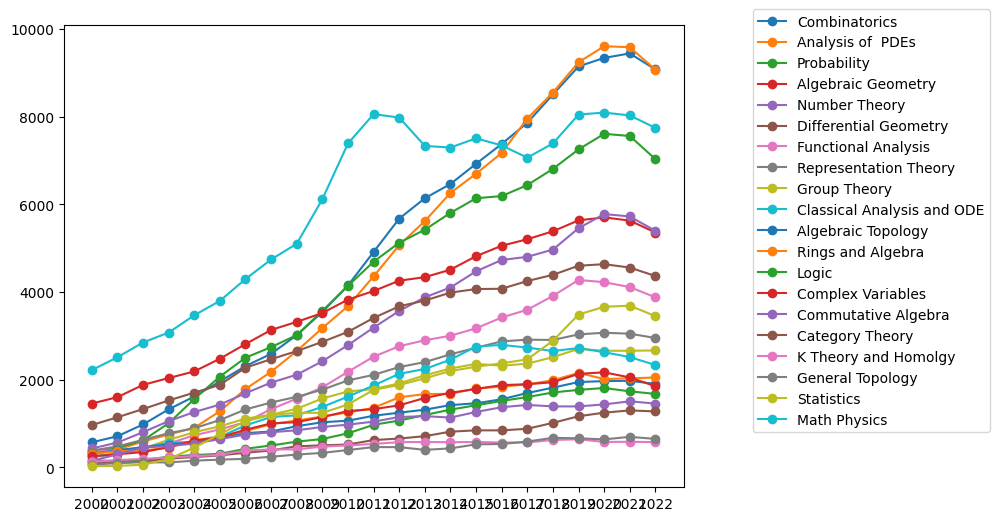

In [13]:
plt.figure(figsize=(8, 6))
for row in df.index:
    plt.plot(df.columns, df.loc[row], marker='o',linestyle='-', label=row)

plt.legend(bbox_to_anchor=(1.1, 1.05))

Want to see the data as proportions per year. This doesnt work...

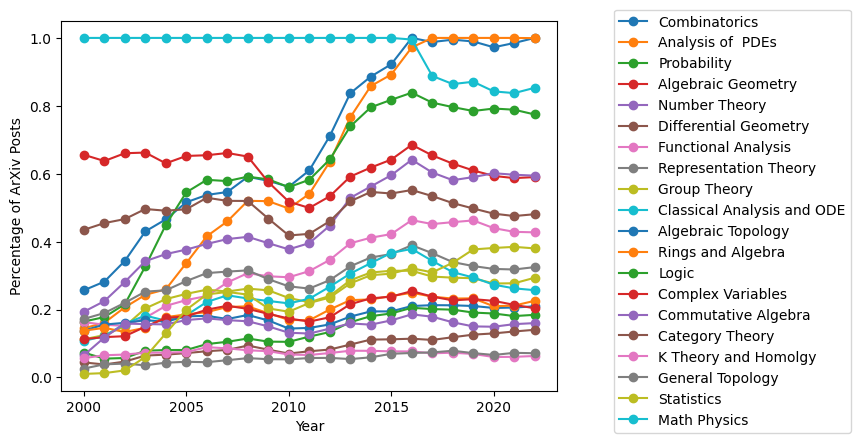

In [14]:
# Calculate the maximum value for each column
max_values = df.iloc[:, :].max(axis=0)

# Rescale each column by dividing by its maximum value
df.iloc[:,:] = df.iloc[:, :].div(max_values, axis=1)

#df.drop(columns=["2022"])

for row in df.index:
    plt.plot(df.columns, df.loc[row], marker='o',linestyle='-', label=row)

plt.xticks(range(0, 24, 5))
plt.xlabel('Year')
plt.ylabel('Percentage of ArXiv Posts')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig("arxiv.png", bbox_inches="tight")